In [1]:
# First cell - import common data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt# packages
import scanpy as sc
import seaborn as sns
from pathlib import Path
import os
# Your code here

In [11]:
'''  The gene expression of two datasets at two different timepoints 3.5 and 4.5 is investigated by generating ballonplots(dotplots from scanpy) and heatmaps.
The genes are selected from a list received by Shifaan, which was generated through several analysis steps (Ciara, spapros, marker genes,lefty1 correlation) and biological knowledge.


'''

#load the data

BASE_PATH = Path("../../Shankar_genes/SPAPROS_11.24")

# Time point 3, two different datasets
adata_3_1 = sc.read_h5ad(BASE_PATH / "time_3" / "endo_time_3_dataset_1.h5ad")
adata_3_2 = sc.read_h5ad(BASE_PATH / "time_3" / "endo_time_3_dataset_wolf.h5ad")

# Time point 4, two different datasets
adata_4_1 = sc.read_h5ad(BASE_PATH / "time_4" / "endo_time_4_dataset_1.h5ad")
adata_4_2 = sc.read_h5ad(BASE_PATH / "time_4" / "endo_time_4_dataset_wolf.h5ad")

# not all genes are capitalized, which causes issues --> all genes from all datasets/lists need to be capitalized
adata_3_2.var_names = [gene.upper() for gene in adata_3_2.var_names]
adata_4_2.var_names = [gene.upper() for gene in adata_4_2.var_names]


# selected genes from list that Shifaan sent me

selected_genes = pd.read_csv('/Users/kimjob/PhD/PhD/Scripts/Shankar/Adapted_gene_list/Gene_selection.csv')

Genes = selected_genes['Gene'].str.upper().tolist()  # Ensure genes are uppercase for consistency

In [3]:
# investigating normalization of gene --> checking normalzed values and raw values

gene_value_X = adata_3_1[:, 'HSP90AA1'].X.toarray() # the X matrix contains normalized-log-transformed  data. 
print('gene value of HSP90AA1:', gene_value_X)

print('mean:', np.mean(gene_value_X))


gene value of HSP90AA1: [[3.70960214]
 [3.68642671]
 [4.25238768]
 [4.17133775]
 [4.07966675]
 [3.83112758]
 [4.37820855]
 [3.97594748]
 [4.51013635]
 [4.28815142]
 [4.52460082]
 [3.26859538]
 [4.53034735]
 [4.15558557]
 [4.35865614]
 [4.4907434 ]
 [4.35011014]
 [3.62241894]
 [4.02223562]
 [4.37407568]
 [3.56326009]
 [4.44599422]
 [3.98447055]
 [4.36537492]
 [4.14582161]
 [4.47909468]
 [4.39529723]
 [3.61277642]
 [4.67049913]
 [2.72324149]
 [3.3824938 ]
 [4.73919219]
 [4.49953329]
 [4.42251127]
 [4.46461729]
 [3.80333772]
 [4.0378273 ]
 [3.69179062]
 [4.08975041]
 [3.86367229]
 [3.60244084]
 [3.81820079]
 [3.34582906]
 [4.26285178]
 [2.38410108]
 [3.10186082]
 [4.39788089]
 [3.50340702]
 [4.47276876]
 [4.27073816]
 [4.13979387]
 [4.00112877]
 [3.98912081]
 [4.53342901]
 [3.61781069]
 [4.16729686]
 [3.68767272]
 [4.11692809]
 [3.34942176]
 [4.25628897]
 [3.83680227]
 [4.19489837]
 [4.34253953]
 [3.92324634]
 [3.75186479]
 [3.45805685]
 [3.92505796]
 [3.65042413]
 [4.26268735]
 [4.331028

In [27]:
adata_3_1

AnnData object with n_obs × n_vars = 698 × 13762
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'integrated_snn_res.0.1', 'seurat_clusters'
    var: 'name'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

AnnData object with n_obs × n_vars = 698 × 13762
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'integrated_snn_res.0.1', 'seurat_clusters'
    var: 'name'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

In [9]:
def filter_genes_list(adata, genes_list, dataset_name):
    # Find genes that exist in the dataset
    existing_genes = [gene for gene in genes_list if gene in adata.var_names]
    
    # Print summary
    print(f"\n{dataset_name}:")
    print(f"Original number of genes: {len(genes_list)}")
    print(f"Number of genes found: {len(existing_genes)}")
    print(f"Number of genes missing: {len(genes_list) - len(existing_genes)}")
    
    return existing_genes

# Create filtered gene lists for each dataset
Genes_3_1 = filter_genes_list(adata_3_1, Genes, "Dataset 3.1")
Genes_3_2 = filter_genes_list(adata_3_2, Genes, "Dataset 3.2")
Genes_4_1 = filter_genes_list(adata_4_1, Genes, "Dataset 4.1")
Genes_4_2 = filter_genes_list(adata_4_2, Genes, "Dataset 4.2")


Dataset 3.1:
Original number of genes: 188
Number of genes found: 163
Number of genes missing: 25

Dataset 3.2:
Original number of genes: 188
Number of genes found: 177
Number of genes missing: 11

Dataset 4.1:
Original number of genes: 188
Number of genes found: 163
Number of genes missing: 25

Dataset 4.2:
Original number of genes: 188
Number of genes found: 177
Number of genes missing: 11


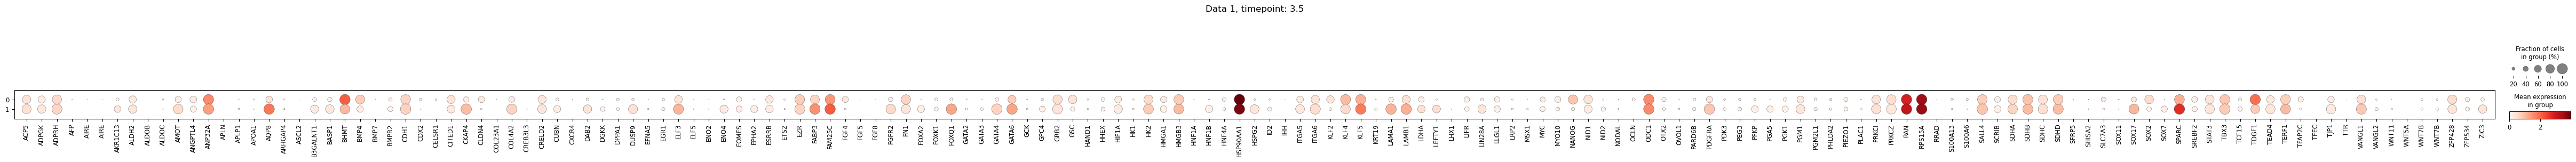

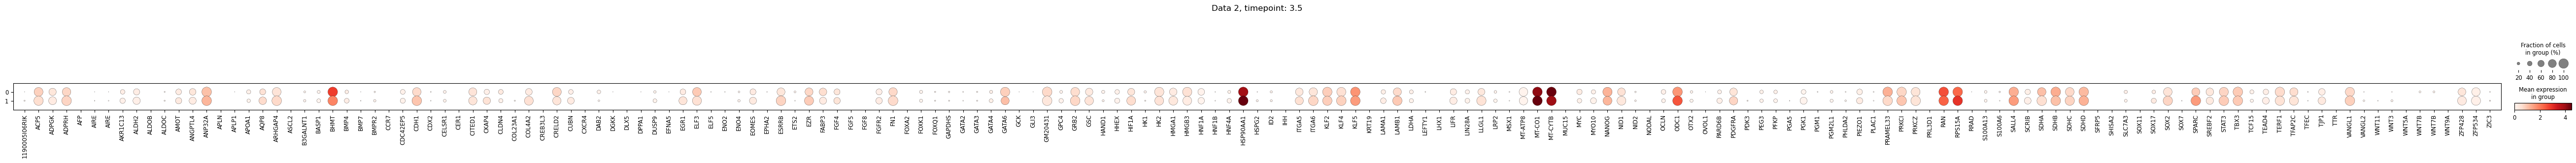

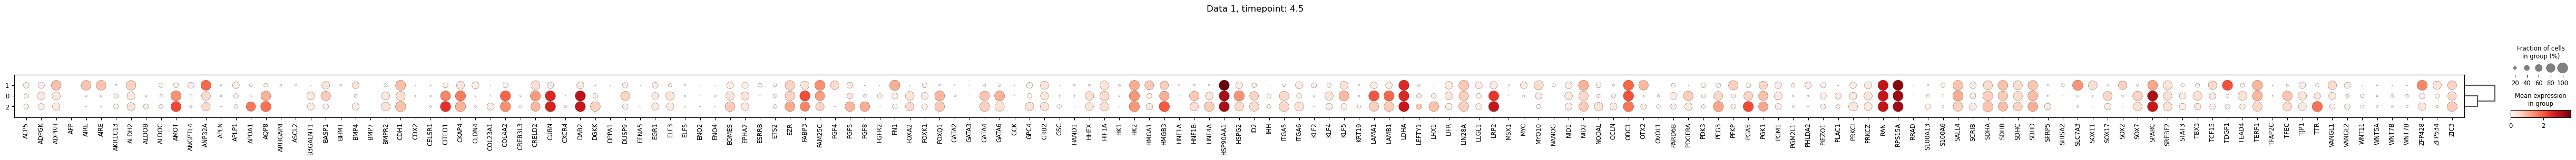

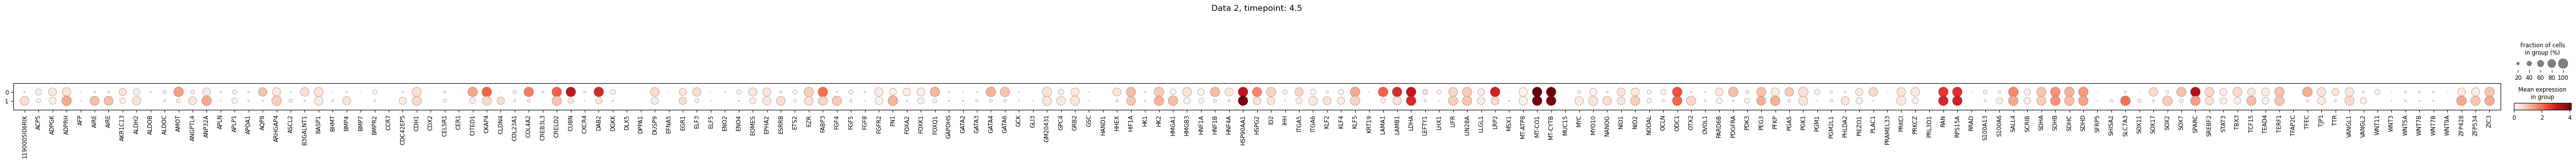

In [10]:
### creating dotplots ### 

# A quick way to check the expression of these genes per cluster is to using a dotplot. 
# This type of plot summarizes two types of information: the color represents the mean expression within each of the categories (in this case in each cluster) and the dot size indicates the fraction of cells in the categories expressing a gene. (documentation)


sc.pl.dotplot(adata_3_1, var_names=Genes_3_1, groupby="seurat_clusters", dendrogram=True, title='Data 1, timepoint: 3.5')
sc.pl.dotplot(adata_3_2, var_names=Genes_3_2, groupby="seurat_clusters", dendrogram=True, title='Data 2, timepoint: 3.5')
sc.pl.dotplot(adata_4_1, var_names=Genes_4_1, groupby="seurat_clusters", dendrogram=True, title='Data 1, timepoint: 4.5')
sc.pl.dotplot(adata_4_2, var_names=Genes_4_2, groupby="seurat_clusters", dendrogram=True, title='Data 2, timepoint: 4.5')



data 1, tp. 3.5:


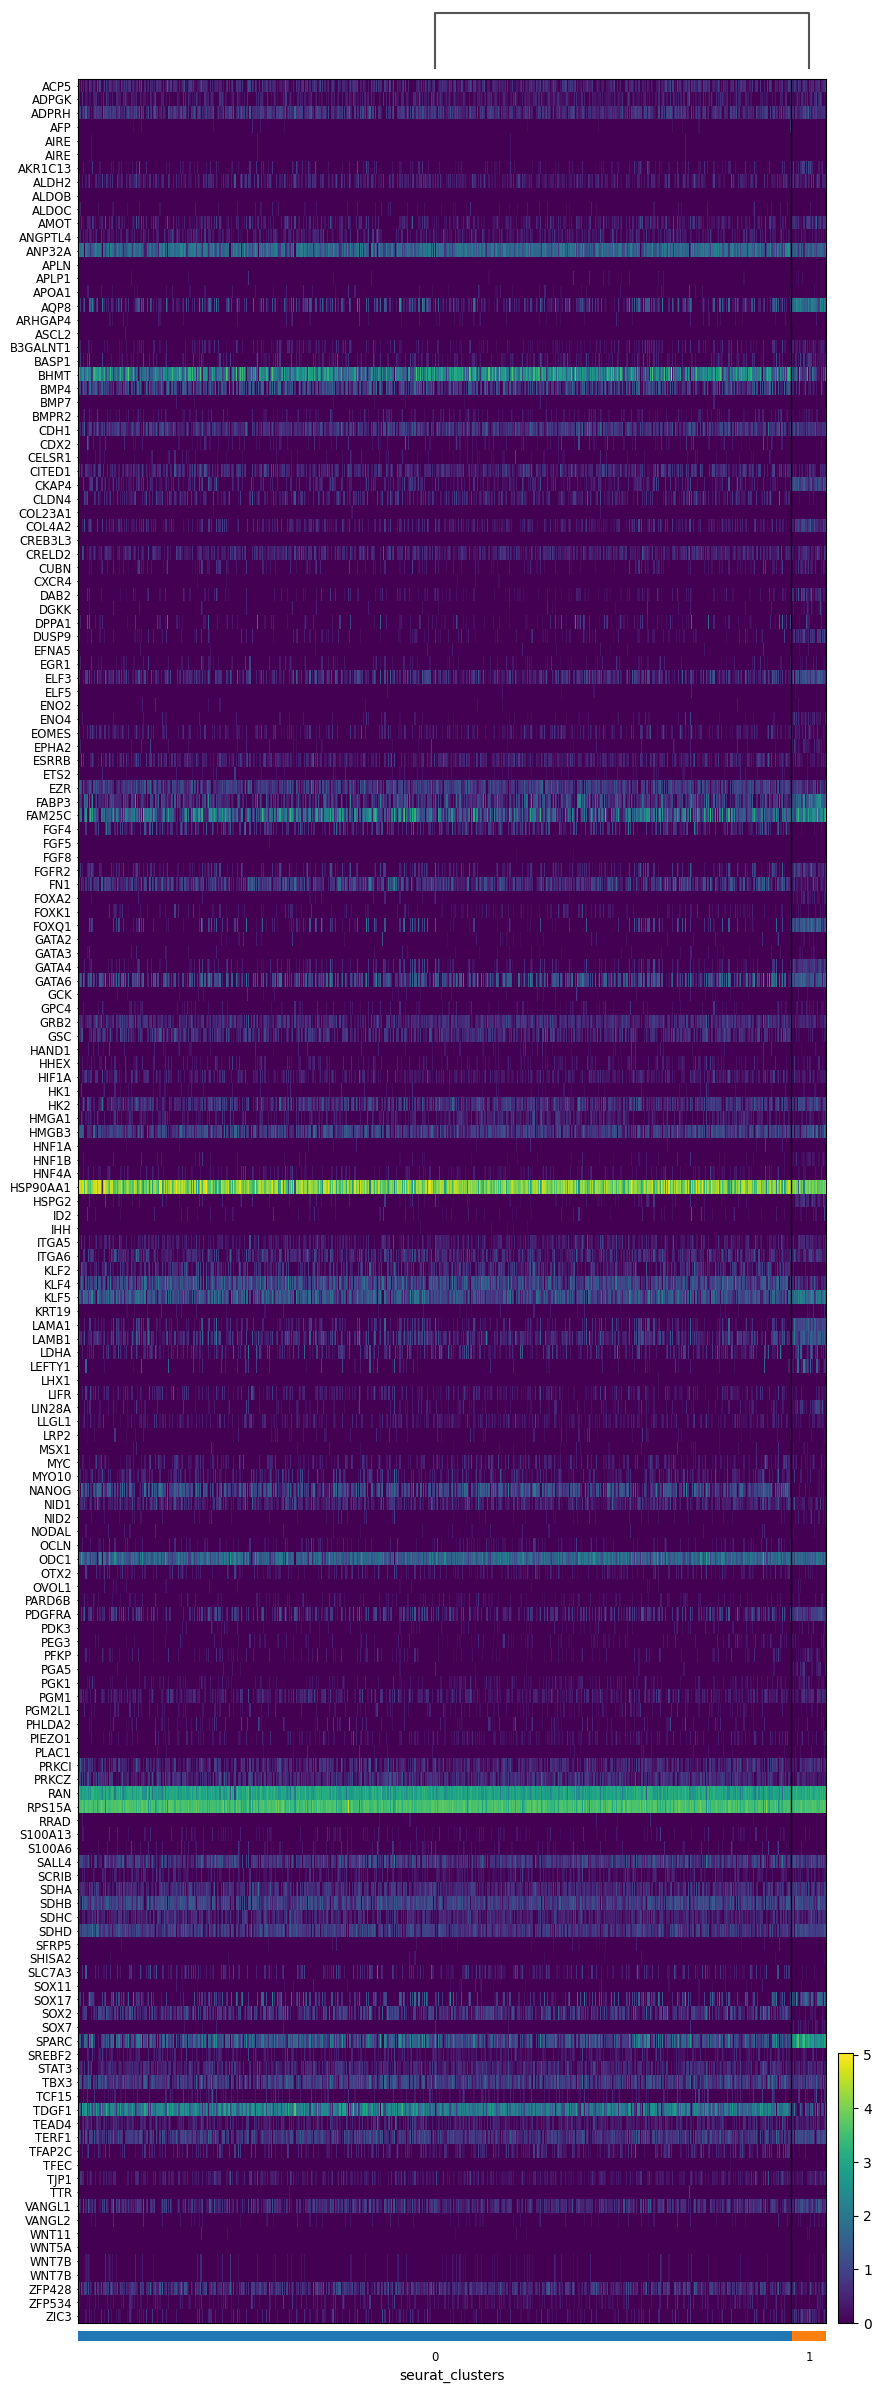

data 2, tp. 3.5:


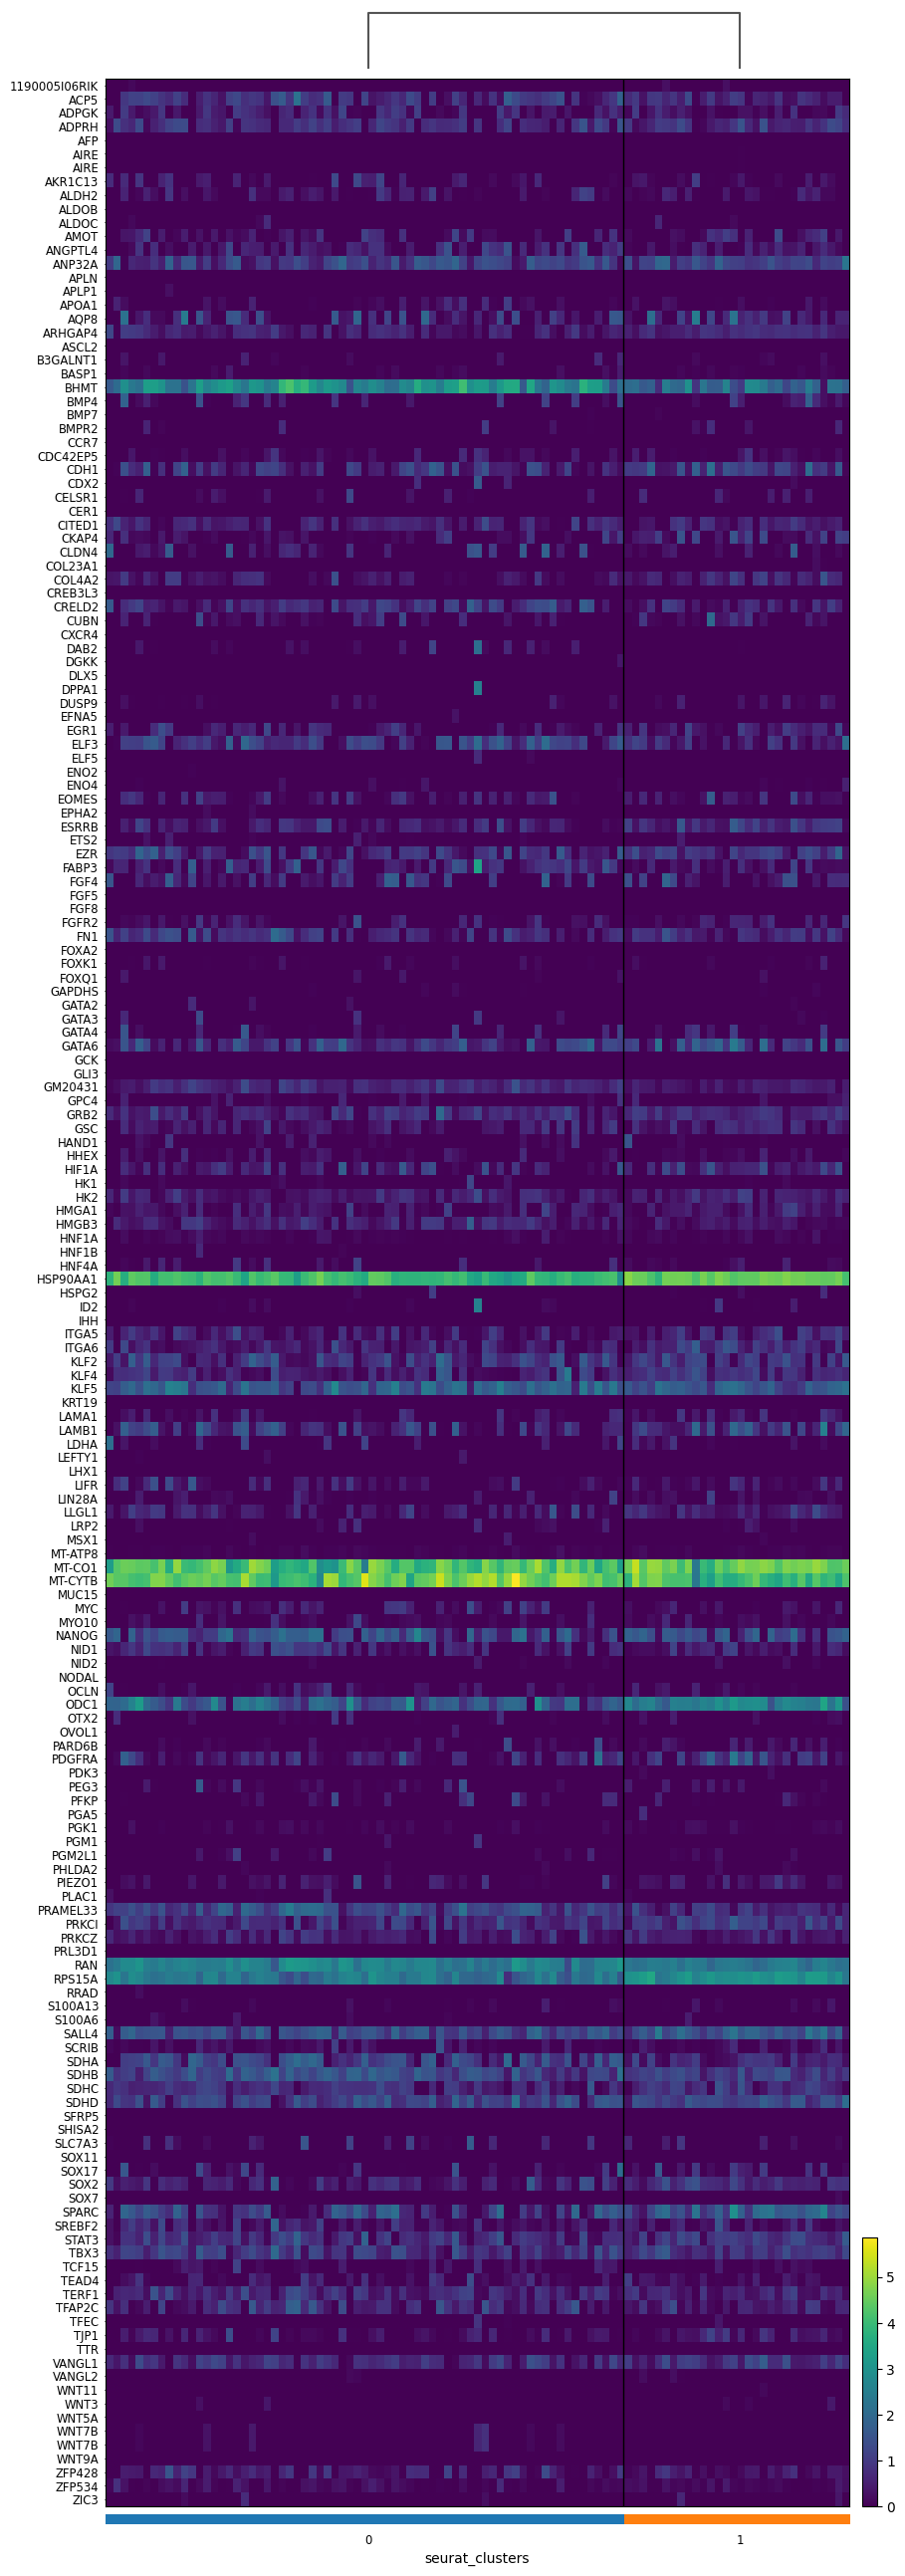

data 1, tp. 4.5:


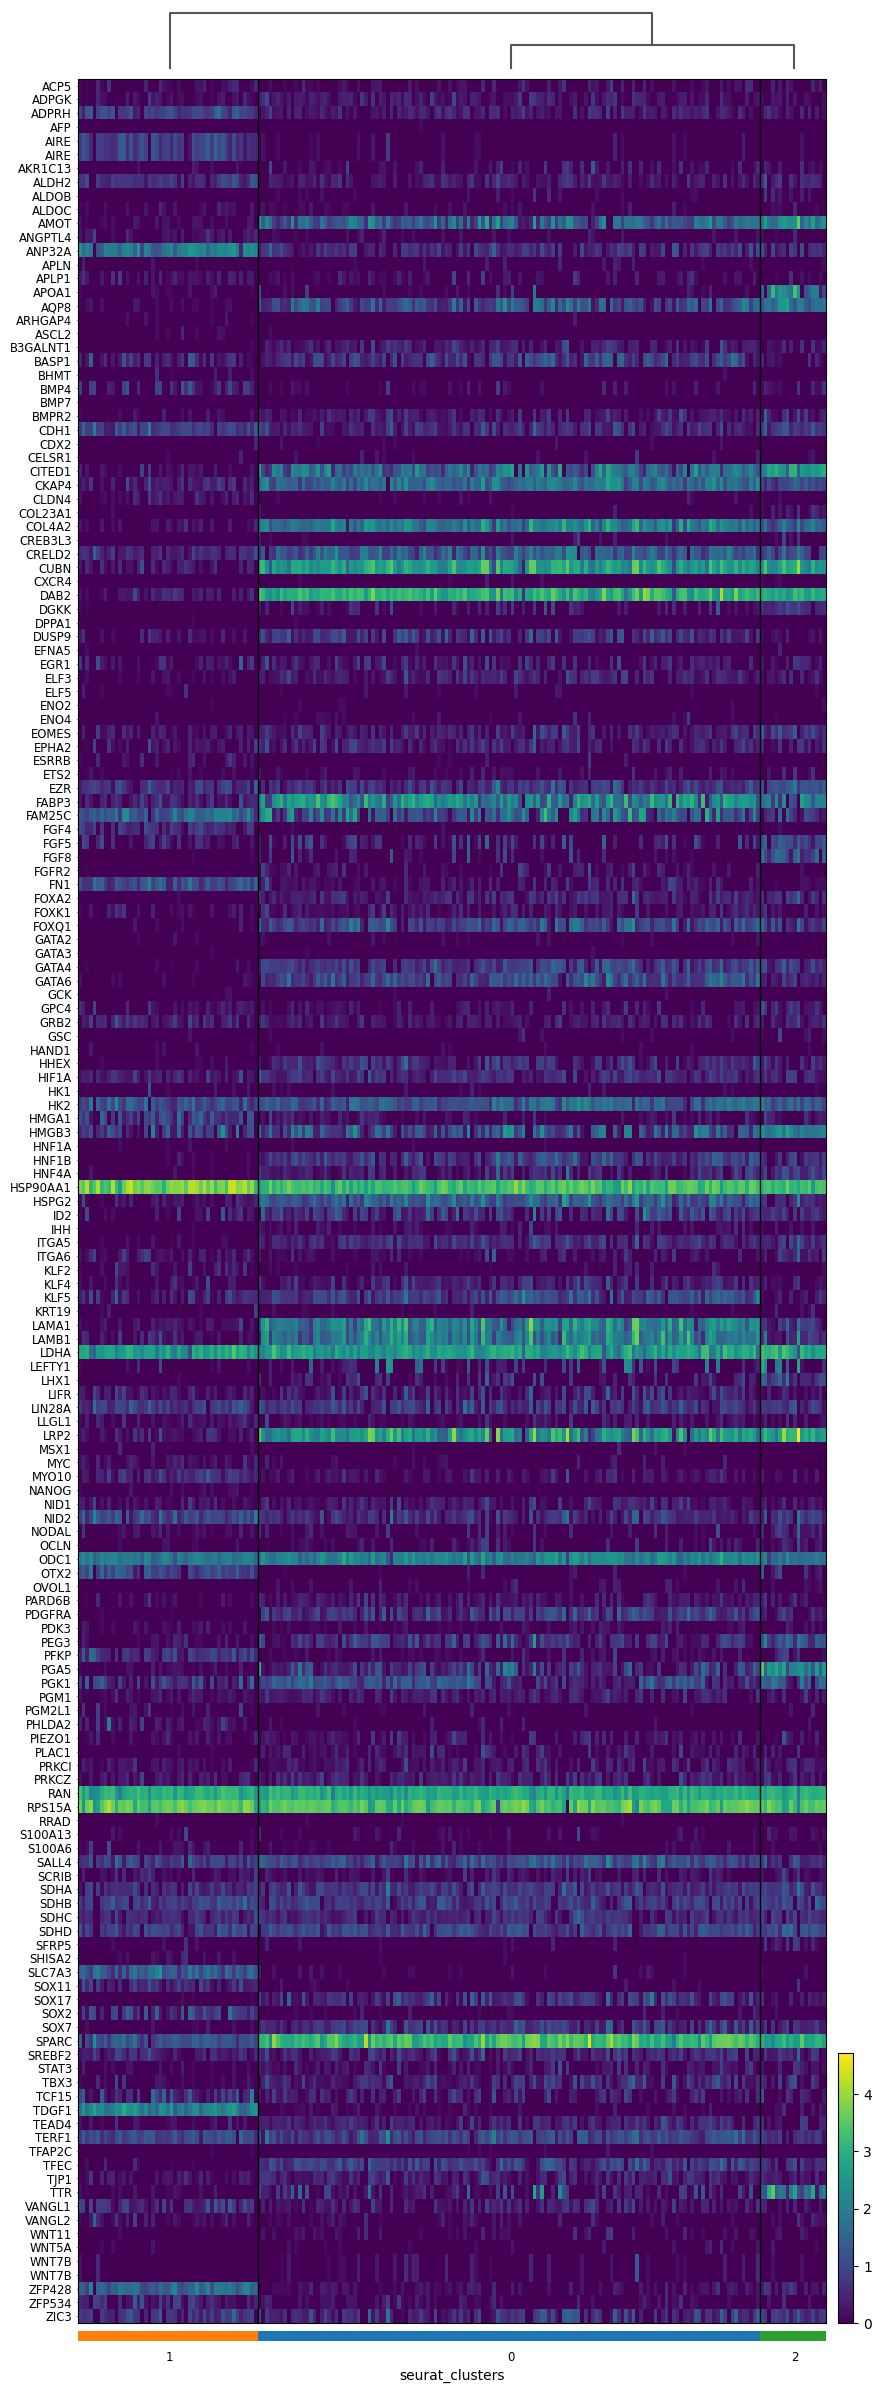

data 2, tp. 4.5:


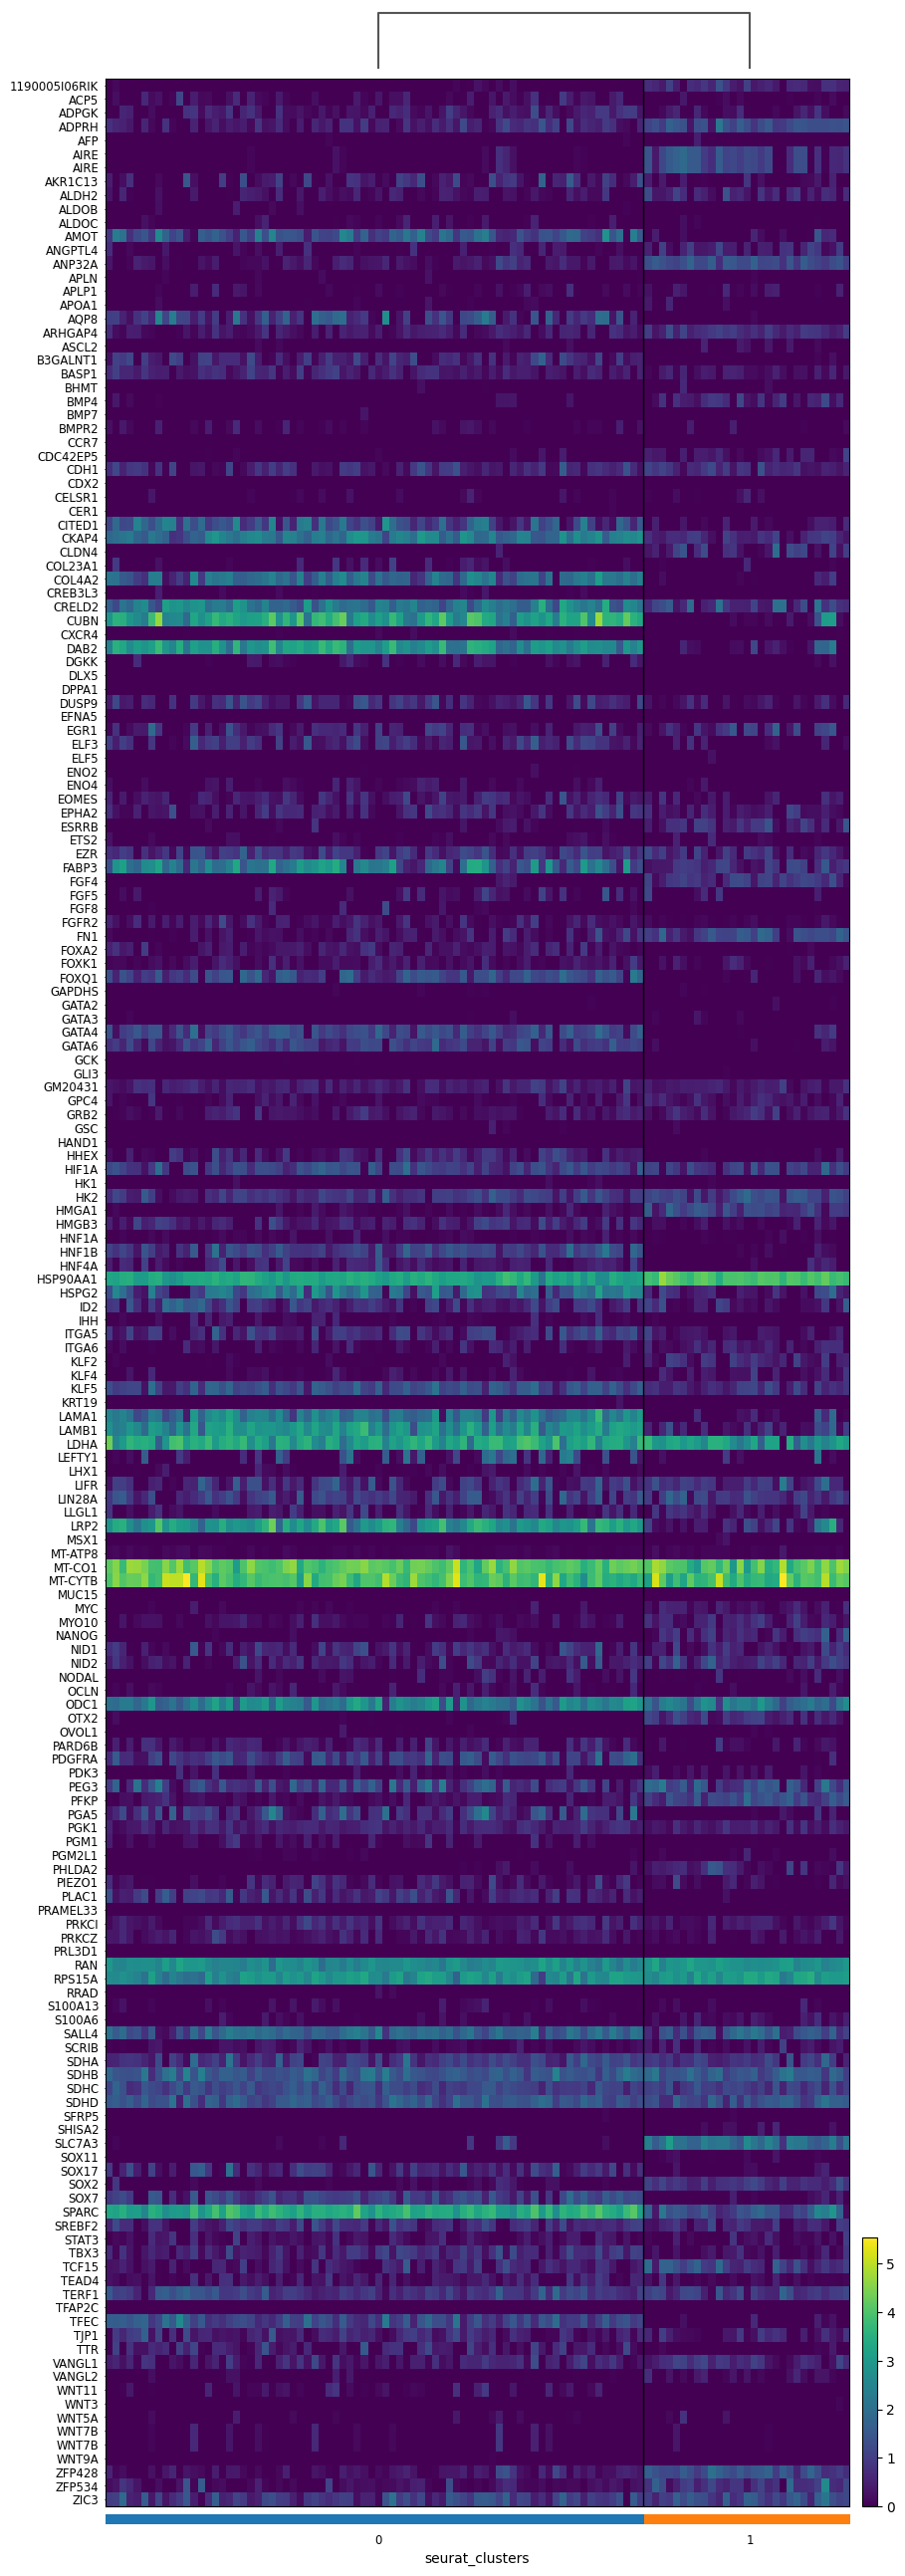

In [160]:

### creating heatmaps ###

print('data 1, tp. 3.5:')
sc.pl.heatmap(adata_3_1, var_names=Genes_3_1, groupby="seurat_clusters", dendrogram=True,cmap="viridis",swap_axes=True,show_gene_labels=True)
print('data 2, tp. 3.5:')
sc.pl.heatmap(adata_3_2, var_names=Genes_3_2, groupby="seurat_clusters", dendrogram=True,cmap="viridis",swap_axes=True,show_gene_labels=True)
print('data 1, tp. 4.5:')
sc.pl.heatmap(adata_4_1, var_names=Genes_4_1, groupby="seurat_clusters", dendrogram=True,cmap="viridis",swap_axes=True,show_gene_labels=True)
print('data 2, tp. 4.5:')
sc.pl.heatmap(adata_4_2, var_names=Genes_4_2, groupby="seurat_clusters", dendrogram=True,cmap="viridis",swap_axes=True,show_gene_labels=True)


In [170]:
## create heatmap from selected genes (similar to the S6 figure in the paper: clusters:

# selected genes of interest 

selection_genes = ['Efna1', 'Efna2', 'Efna3', 'Efna4', 'Efna5', 'Efnb1', 'Efnb2', 'Efnb3', 'Epha1', 'Epha2', 'Epha4', 'Epha5', 'Epha7', 'Epha8', 'Epha10', 'Ephb1', 'Ephb2', 'Ephb3', 'Ephb4', 'Ephb6', 'Fgfr2', 'Fgfr3', 'Fgfr4', 'Wnt5a']

#capitalized
Genes_selected = [gene.upper() for gene in selection_genes]

# create loop to select these genes in the 4 datasets.

for gene in adata_3_1.var['name']:
    if gene == Genes_selected:
        print(f'found gene {gene} in datasets adata_3_1')
   




In [205]:
def check_genes(gene_list, adata, dataset_name=""):
    print(f"\nChecking genes in {dataset_name}")

    adata_genes = set(gene.upper() for gene in adata.var_names)

    present_genes = [gene for gene in gene_list if gene.upper() in adata_genes] # checks which genes of the list are in the data
    missing_genes = [gene for gene in gene_list if gene.upper() not in adata_genes] # checks which genes are not in the data 

    print('number of genes in list:', len(Genes_selected))

    print(f'missing genes {missing_genes}:', len(missing_genes))
    print(f'present genes {present_genes}:', len(present_genes))



    # if genes from list exist also in dataset, print the specific gene
    if present_genes:
        print(f"\n Genes present both in list and data:")
        for gene in sorted(present_genes):
            print(f"-{gene}")

    # print which gene from list is missing in dataset, print the specific gene
    if missing_genes:
        print(f"\n Genes in list but missing in data:")
        for gene in sorted(missing_genes):
            print(f'-{gene}')


    return present_genes, missing_genes





In [209]:
print(f'Data 1, tp 3.5: ')
present_genes_1, missing_genes_1 = check_genes(Genes_selected, adata_3_1, "adata_3_1")

print(f'Data 2, tp 3.5: ')
present_genes_2, missing_genes_2 = check_genes(Genes_selected, adata_3_2, "adata_3_2")

print(f'Data 1, tp 4.5: ')
present_genes_3, missing_genes_3 = check_genes(Genes_selected, adata_4_1, "adata_4_1")

print(f'Data 2, tp 4.5: ')
present_genes_4, missing_genes_4 = check_genes(Genes_selected, adata_4_2, "adata_4_2")

Data 1, tp 3.5: 

Checking genes in adata_3_1
number of genes in list: 24
missing genes ['EPHA5', 'EPHA8']: 2
present genes ['EFNA1', 'EFNA2', 'EFNA3', 'EFNA4', 'EFNA5', 'EFNB1', 'EFNB2', 'EFNB3', 'EPHA1', 'EPHA2', 'EPHA4', 'EPHA7', 'EPHA10', 'EPHB1', 'EPHB2', 'EPHB3', 'EPHB4', 'EPHB6', 'FGFR2', 'FGFR3', 'FGFR4', 'WNT5A']: 22

 Genes present both in list and data:
-EFNA1
-EFNA2
-EFNA3
-EFNA4
-EFNA5
-EFNB1
-EFNB2
-EFNB3
-EPHA1
-EPHA10
-EPHA2
-EPHA4
-EPHA7
-EPHB1
-EPHB2
-EPHB3
-EPHB4
-EPHB6
-FGFR2
-FGFR3
-FGFR4
-WNT5A

 Genes in list but missing in data:
-EPHA5
-EPHA8
Data 2, tp 3.5: 

Checking genes in adata_3_2
number of genes in list: 24
missing genes []: 0
present genes ['EFNA1', 'EFNA2', 'EFNA3', 'EFNA4', 'EFNA5', 'EFNB1', 'EFNB2', 'EFNB3', 'EPHA1', 'EPHA2', 'EPHA4', 'EPHA5', 'EPHA7', 'EPHA8', 'EPHA10', 'EPHB1', 'EPHB2', 'EPHB3', 'EPHB4', 'EPHB6', 'FGFR2', 'FGFR3', 'FGFR4', 'WNT5A']: 24

 Genes present both in list and data:
-EFNA1
-EFNA2
-EFNA3
-EFNA4
-EFNA5
-EFNB1
-EFNB2
-EFNB3
-E

In [210]:
present_genes_3

['EFNA1',
 'EFNA2',
 'EFNA3',
 'EFNA4',
 'EFNA5',
 'EFNB1',
 'EFNB2',
 'EFNB3',
 'EPHA1',
 'EPHA2',
 'EPHA4',
 'EPHA7',
 'EPHA10',
 'EPHB1',
 'EPHB2',
 'EPHB3',
 'EPHB4',
 'EPHB6',
 'FGFR2',
 'FGFR3',
 'FGFR4',
 'WNT5A']

data 1, tp. 3.5:


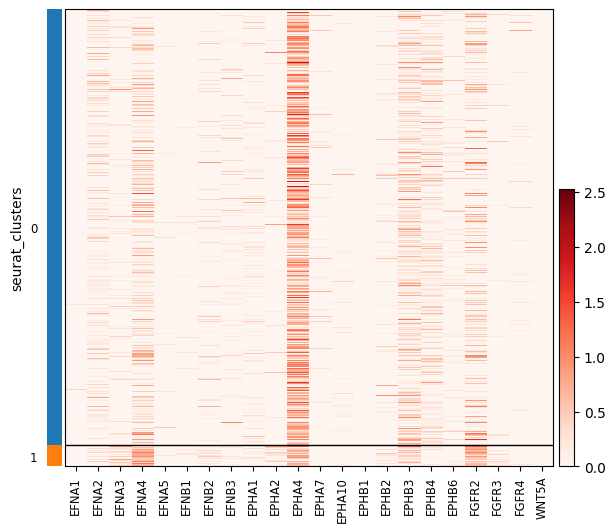

data 2, tp. 3.5:


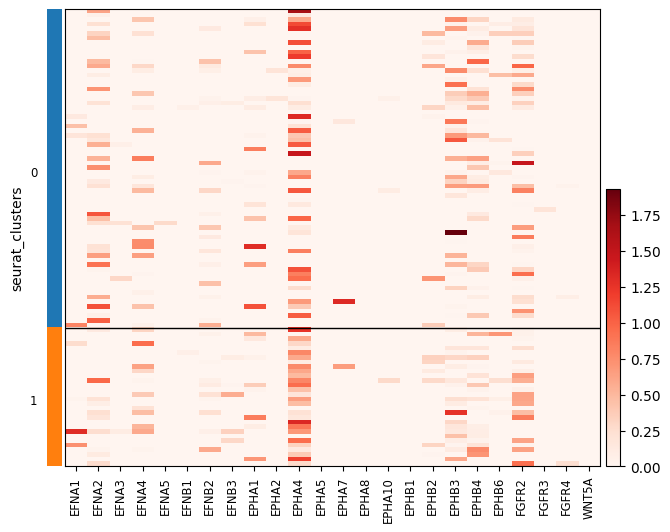

data 1, tp. 4.5:


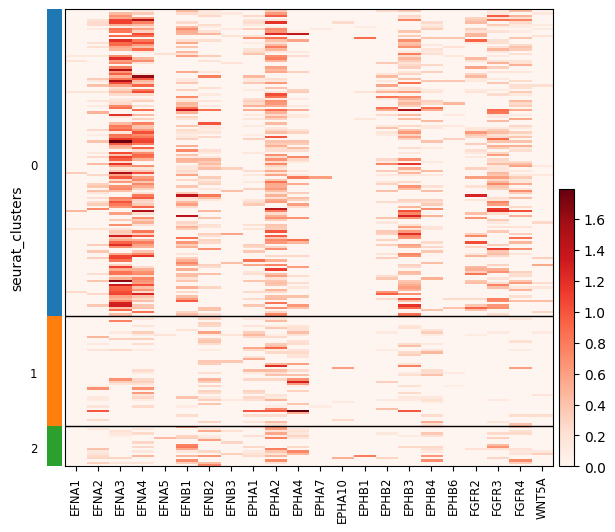

data 2, tp. 4.5:


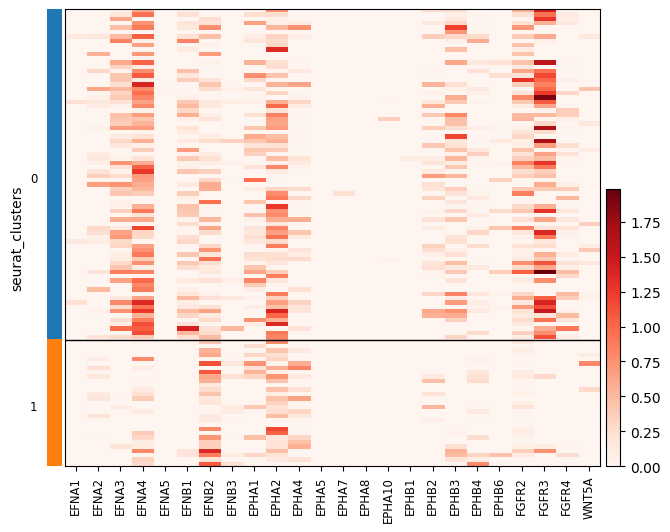

In [246]:

### creating heatmaps ###

#rename seurat_cluster to 

print('data 1, tp. 3.5:')
sc.pl.heatmap(adata_3_1, var_names=present_genes_1, groupby="seurat_clusters", cmap='Reds', show_gene_labels=True)
print('data 2, tp. 3.5:')
sc.pl.heatmap(adata_3_2, var_names=present_genes_2, groupby="seurat_clusters",cmap='Reds', show_gene_labels=True)
print('data 1, tp. 4.5:')
sc.pl.heatmap(adata_4_1, var_names=present_genes_3, groupby="seurat_clusters", cmap='Reds', show_gene_labels=True)
print('data 2, tp. 4.5:')
sc.pl.heatmap(adata_4_2, var_names=present_genes_4, groupby="seurat_clusters", cmap='Reds',show_gene_labels=True)


In [242]:
import scipy
# Get expression values for GPX7

# Get expression values
gpx7_expression = adata_3_1[:, 'GPX7'].X

# Convert to dense array if it's sparse
if scipy.sparse.issparse(gpx7_expression):
    gpx7_expression = gpx7_expression.toarray().flatten()

# Create a dataframe with expression values and cluster information
gpx7_df = pd.DataFrame({
    'GPX7_expression': gpx7_expression,
    'Cluster': adata_3_1.obs['seurat_clusters']
})

# Print basic statistics
print("GPX7 expression statistics:")
print(f"Mean expression: {gpx7_expression.mean():.4f}")
print(f"Max expression: {gpx7_expression.max():.4f}")
print(f"Min expression: {gpx7_expression.min():.4f}")

# Print mean expression by cluster
print("\nMean expression by cluster:")
print(gpx7_df.groupby('Cluster')['GPX7_expression'].mean())


GPX7 expression statistics:
Mean expression: 0.0691
Max expression: 0.6326
Min expression: 0.0000

Mean expression by cluster:
Cluster
0    0.069486
1    0.060071
Name: GPX7_expression, dtype: float64


In [25]:
# Option 1: Use absolute path
base_path_3 = '/Users/kimjob/PhD/PhD/Shankar_genes/data_results/dataset1_tp3.5'
d3_1_1 = pd.read_csv(f'{base_path_3}/genes_embryo_3_0.csv')
d3_1_2 = pd.read_csv(f'{base_path_3}/genes_embryo_3_1.csv')
d3_1_spapros = pd.read_csv(f'{base_path_3}/spapros_markers_dataset1_tp3.csv')

#dataset 1 tp4.5
base_path_4 = '/Users/kimjob/PhD/PhD/Shankar_genes/data_results/dataset1_tp4.5'
d4_1_1 = pd.read_csv(f'{base_path_4}/genes_embryo_4_0.csv') #marker gene
d4_1_2 = pd.read_csv(f'{base_path_4}/genes_embryo_4_1.csv') #marker gene
d4_1_3 = pd.read_csv(f'{base_path_4}/genes_embryo_4_2.csv') #marker gene
d4_1_spapros = pd.read_csv(f'{base_path_4}/spapros_markers_dataset1_tp4.csv') #spapros gene

#dataset 2 tp3.5
base_path_5 = '/Users/kimjob/PhD/PhD/Shankar_genes/data_results/dataset2_tp3.5'
d3_2_1 = pd.read_csv(f'{base_path_5}/genes_embryo_wolf_3_0.csv') #marker gene
d3_2_2 = pd.read_csv(f'{base_path_5}/genes_embryo_wolf_3_1.csv') #marker gene
d3_2_spapros = pd.read_csv(f'{base_path_5}/spapros_markers_dataset2_tp3.csv') #spapros gene

#dataset 2 tp4.5
base_path_6 = '/Users/kimjob/PhD/PhD/Shankar_genes/data_results/dataset2_tp4.5'
d4_2_1 = pd.read_csv(f'{base_path_6}/genes_embryo_4_epi.csv') #marker gene
d4_2_3 = pd.read_csv(f'{base_path_6}/genes_embryo_4_pe.csv') #marker gene
d4_2_spapros = pd.read_csv(f'{base_path_6}/spapros_markers_dataset2_tp4.csv') #spapros gene

# genes where there is a threshold put on lefty1 correlation
base_path_7 = '/Users/kimjob/PhD/PhD/Shankar_genes/data_results/lefty1_corr_eps'
d3_1_corr = pd.read_csv(f'{base_path_7}/corr_genes_embryo_3_1_high.csv') # lefty1 correlation data 1 tp 3
d4_1_corr = pd.read_csv(f'{base_path_7}/corr_genes_embryo_4_1_final.csv') # lefty1 correlation data 1 tp 3
d4_2_corr = pd.read_csv(f'{base_path_7}/corr_genes_embryo_4_2_high.csv') # lefty1 correlation data 1 tp 3

base_path_8 = '/Users/kimjob/PhD/PhD/Shankar_genes/SPAPROS_11.24'
d3_1_ciara = pd.read_csv(f'{base_path_8}/time_3/ciara_genes_embryo_3_1.csv')
d3_2_ciara = pd.read_csv(f'{base_path_8}/time_3/ciara_genes_embryo_3_2.csv')
d4_1_ciara = pd.read_csv(f'{base_path_8}/time_4/ciara_genes_embryo_4_1.csv')
d4_2_ciara = pd.read_csv(f'{base_path_8}/time_4/ciara_genes_embryo_4_2.csv')


In [271]:
adata_3_1.obs

,orig.ident,nCount_RNA,nFeature_RNA,stim,integrated_snn_res.0.1,seurat_clusters
Lib1-3_E3.5_120703409121134,Lib1-3,51710.0,5804,Rep1,0,0
Lib1-3_E3.5_120703409412894,Lib1-3,50383.0,5687,Rep1,0,0
Lib1-3_E3.5_120726911864227,Lib1-3,27139.0,4685,Rep1,0,0
Lib1-3_E3.5_120772961651102,Lib1-3,38400.0,5756,Rep1,0,0
Lib1-3_E3.5_121202343111005,Lib1-3,54881.0,5825,Rep1,0,0
...,...,...,...,...,...,...
Lib1-4_E3.5_240617715514587,Lib1-4,15082.0,3516,Rep2,0,0
Lib1-4_E3.5_241098904779676,Lib1-4,31794.0,5002,Rep2,0,0
Lib1-4_E3.5_241106421471461,Lib1-4,41034.0,5243,Rep2,0,0
Lib1-4_E3.5_241114561832686,Lib1-4,38757.0,5538,Rep2,0,0


In [270]:
# How to access the gene expression of a specific gene

gene_name = 'HSP90AA1' # example gene
gene_expression = adata_3_1[:, gene_name].X # matrix with the gene expression

# Convert to dense array if it's sparse
if scipy.sparse.issparse(gene_expression):
    gene_expression = gene_expression.toarray().flatten()

print(f"Expression values for {gene_name}:")
print(gene_expression)

Expression values for HSP90AA1:
[3.70960214 3.68642671 4.25238768 4.17133775 4.07966675 3.83112758
 4.37820855 3.97594748 4.51013635 4.28815142 4.52460082 3.26859538
 4.53034735 4.15558557 4.35865614 4.4907434  4.35011014 3.62241894
 4.02223562 4.37407568 3.56326009 4.44599422 3.98447055 4.36537492
 4.14582161 4.47909468 4.39529723 3.61277642 4.67049913 2.72324149
 3.3824938  4.73919219 4.49953329 4.42251127 4.46461729 3.80333772
 4.0378273  3.69179062 4.08975041 3.86367229 3.60244084 3.81820079
 3.34582906 4.26285178 2.38410108 3.10186082 4.39788089 3.50340702
 4.47276876 4.27073816 4.13979387 4.00112877 3.98912081 4.53342901
 3.61781069 4.16729686 3.68767272 4.11692809 3.34942176 4.25628897
 3.83680227 4.19489837 4.34253953 3.92324634 3.75186479 3.45805685
 3.92505796 3.65042413 4.26268735 4.33102855 3.97502847 4.54265076
 4.20317503 3.70307905 4.02061571 3.253381   3.62809017 4.32359647
 4.35771698 3.63851026 4.42869587 3.29218688 4.44813486 4.38482586
 3.41998207 4.3985509  4.08312

In [225]:
from scipy.sparse import csr_matrix
'''
function that filters out the count matrix based on the min number of cells and min gene expression:

- give adata (Annadata) as input 
parameters:
- n: minimal number of cells where the gene should be epressed
-  min_e: the minimal expression level the gene should have (as p value))
'''

def filtering_genes(adata, n, min_e):

    expression_matrix = adata.X.toarray() #expression matrix for data 1 tp 3.5 ---> .toarray() necessary because it is a sparse matrix

    n_cells = n # minimum number of cells where gene should be expressed
    min_expression = min_e # minimum numper of cells

    gene_exp_in_cells = (expression_matrix > min_expression).sum(axis=0) # number of cells where genes are expressed
    print('gene_exp_in_cells:', gene_exp_in_cells)
    keeping_genes =  gene_exp_in_cells >= n_cells
    print('genes that are kept: {keeping_genes}', len(keeping_genes))
    keeping_genes.flatten() # ensure it's 1D

    filtered_matrix = expression_matrix[:, keeping_genes]

    return filtered_matrix, keeping_genes

# First set of parameters: n=10, min_e=0.5
print("Filtering with n=10 cells, min_expression=0.5:")

# Apply filtering function to each dataset
filtered_matrix_31_10, keeping_genes_31_10 = filtering_genes(adata_3_1, n=10, min_e=0.5)
filtered_matrix_32_10, keeping_genes_32_10 = filtering_genes(adata_3_2, n=10, min_e=0.5)
filtered_matrix_41_10, keeping_genes_41_10 = filtering_genes(adata_4_1, n=10, min_e=0.5)
filtered_matrix_42_10, keeping_genes_42_10 = filtering_genes(adata_4_2, n=10, min_e=0.5)

# Create filtered AnnData objects
adata_filtered_31_10 = adata_3_1[:, keeping_genes_31_10].copy()
adata_filtered_32_10 = adata_3_2[:, keeping_genes_32_10].copy()
adata_filtered_41_10 = adata_4_1[:, keeping_genes_41_10].copy()
adata_filtered_42_10 = adata_4_2[:, keeping_genes_42_10].copy()

# Print summary of filtering results for n=10
print("\nNumber of genes remaining after filtering (n=10):")
print(f"Dataset 3.1: {adata_filtered_31_10.n_vars} genes")
print(f"Dataset 3.2: {adata_filtered_32_10.n_vars} genes")
print(f"Dataset 4.1: {adata_filtered_41_10.n_vars} genes")
print(f"Dataset 4.2: {adata_filtered_42_10.n_vars} genes")

# Second set of parameters: n=5, min_e=0.5
print("\nFiltering with n=5 cells, min_expression=0.5:")

# apply filtering function to 4 datasets with number cells where gene expressed = 5, and min expression = 0.5
filtered_matrix_31_5, keeping_genes_31_5 = filtering_genes(adata_3_1, n=5, min_e=0.5)
filtered_matrix_32_5, keeping_genes_32_5 = filtering_genes(adata_3_2, n=5, min_e=0.5)
filtered_matrix_41_5, keeping_genes_41_5 = filtering_genes(adata_4_1, n=5, min_e=0.5)
filtered_matrix_42_5, keeping_genes_42_5 = filtering_genes(adata_4_2, n=5, min_e=0.5)

# Create filtered AnnData objects
adata_filtered_31_5 = adata_3_1[:, keeping_genes_31_5].copy()
adata_filtered_32_5 = adata_3_2[:, keeping_genes_32_5].copy()
adata_filtered_41_5 = adata_4_1[:, keeping_genes_41_5].copy()
adata_filtered_42_5 = adata_4_2[:, keeping_genes_42_5].copy()

# Print summary of filtering results for n=5
print("\nNumber of genes remaining after filtering (n=5):")
print(f"Dataset 3.1: {adata_filtered_31_5.n_vars} genes")
print(f"Dataset 3.2: {adata_filtered_32_5.n_vars} genes")
print(f"Dataset 4.1: {adata_filtered_41_5.n_vars} genes")
print(f"Dataset 4.2: {adata_filtered_42_5.n_vars} genes")

# Create dictionaries for both filtered sets
datasets_10 = {
    'Dataset 3.1': adata_filtered_31_10,
    'Dataset 4.1': adata_filtered_41_10,
    'Dataset 4.2': adata_filtered_42_10,
    'Dataset 3.2': adata_filtered_32_10
}

datasets_5 = {
    'Dataset 3.1': adata_filtered_31_5,
    'Dataset 4.1': adata_filtered_41_5,
    'Dataset 4.2': adata_filtered_42_5,
    'Dataset 3.2': adata_filtered_32_5
}

# Compare the number of genes between the two filtering conditions
print("\nComparison of gene numbers between filtering conditions:")
for name in datasets_10.keys():
    n_genes_10 = datasets_10[name].n_vars
    n_genes_5 = datasets_5[name].n_vars
    diff = n_genes_5 - n_genes_10
    print(f"\n{name}:")
    print(f"n=10 cells: {n_genes_10} genes")
    print(f"n=5 cells: {n_genes_5} genes")
    print(f"Difference: {diff} more genes in n=5 condition")

Filtering with n=10 cells, min_expression=0.5:
gene_exp_in_cells: [ 12  40 698 ...  27   2  20]
genes that are kept: {keeping_genes} 13762
gene_exp_in_cells: [35  0  0 ... 99 97 99]
genes that are kept: {keeping_genes} 24779
gene_exp_in_cells: [  3  11 203 ...  18   1  21]
genes that are kept: {keeping_genes} 13762
gene_exp_in_cells: [  9   0   0 ... 105 104 105]
genes that are kept: {keeping_genes} 24779

Number of genes remaining after filtering (n=10):
Dataset 3.1: 8151 genes
Dataset 3.2: 6111 genes
Dataset 4.1: 6311 genes
Dataset 4.2: 6439 genes

Filtering with n=5 cells, min_expression=0.5:
gene_exp_in_cells: [ 12  40 698 ...  27   2  20]
genes that are kept: {keeping_genes} 13762
gene_exp_in_cells: [35  0  0 ... 99 97 99]
genes that are kept: {keeping_genes} 24779
gene_exp_in_cells: [  3  11 203 ...  18   1  21]
genes that are kept: {keeping_genes} 13762
gene_exp_in_cells: [  9   0   0 ... 105 104 105]
genes that are kept: {keeping_genes} 24779

Number of genes remaining after fi

In [257]:
# returning correlation list

def corr_gene(adata, target_gene):
    expr_matrix = adata.X.toarray()
    df = pd.DataFrame(expr_matrix, columns=adata.var_names)
    
    # Make sure to use the exact gene name as it appears in the dataset
    correlations = df.corrwith(df[target_gene], method='pearson')
    correlations_sorted = correlations.sort_values(ascending=False)
    correlations_sorted = correlations_sorted[correlations_sorted.index != target_gene]
    
    return correlations_sorted

# Calculate correlations for higher eps
correlation_results_10 = {} # 10 because, min expr should be in at least 10 cells
for name, adata in datasets_10.items():
    print(f"\nAnalyzing {name} (higher eps):")
    correlations = corr_gene(adata, 'LEFTY1')  # Make sure this matches the exact case in your data
    
    if correlations is not None:
        correlation_results_10[name] = correlations
        
        # Create DataFrame for significant correlations
        significant_correlations = correlations[correlations.abs() >= 0.3]
        significant_df = significant_correlations.reset_index()
        significant_df.columns = ['Gene', 'Correlation']  # Rename columns for clarity
        
        # Store DataFrame in a variable for each dataset
        if name == 'Dataset 3.1':
            df_31 = significant_df
        elif name == 'Dataset 4.1':
            df_41 = significant_df
        elif name == 'Dataset 4.2':
            df_42 = significant_df
        
        print("Positive correlated genes:")
        print(significant_df[significant_df['Correlation'] > 0], len(significant_df[significant_df['Correlation'] > 0]))
        print('Negative correlated genes:')
        print(significant_df[significant_df['Correlation'] < 0], len(significant_df[significant_df['Correlation'] < 0]))



'''if correlations.values > 0:
        print("positive correlated genes:")
        print(correlations.sort_values(ascending=True))
    else:
        print("negative correlated genes:")
        print(correlations.sort_values(ascending=False))
'''


Analyzing Dataset 3.1 (higher threshold):
Positive correlated genes:
        Gene  Correlation
0     LEFTY2     0.461829
1       SRGN     0.408203
2        AMN     0.357996
3       TFPI     0.356069
4      HTRA1     0.328730
5      PTH1R     0.325363
6     HPCAL1     0.324842
7     GLIPR2     0.322034
8      BEND5     0.321157
9       HOPX     0.320938
10       ID1     0.319762
11     SPARC     0.318699
12   FAM129B     0.313704
13    DNMT3B     0.309350
14  SERPINH1     0.307029
15    MOGAT2     0.303072
16     FOXQ1     0.302555
17       EMB     0.300779 18
Negative correlated genes:
       Gene  Correlation
18  TMEM41B     -0.32526 1

Analyzing Dataset 4.1 (higher threshold):
Positive correlated genes:
             Gene  Correlation
0           NODAL     0.492650
1            FGF8     0.443491
2          LEFTY2     0.441994
3   A730049H05RIK     0.439625
4           PYCR2     0.416098
5           FOXQ1     0.413911
6           LIMA1     0.411286
7           HMGB3     0.409291
8    

KeyError: 'LEFTY1'

In [262]:
# saving the lists as CSV files 

df_31.to_csv('./df_31.csv', index=False)  # Save Dataset 3.1
df_41.to_csv('./df_41.csv', index=False)  # Save Dataset 4.1
df_42.to_csv('./df_42.csv', index=False)  # Save Dataset 4.2

In [296]:
### Filtering marker genes ###

# Step 1: Rank genes by p-value
def rank_genes_by_pvalue(adata, groupby):

    sc.tl.rank_genes_groups(adata, groupby=groupby, method='wilcoxon')
    cluster_ids = adata.obs[groupby].unique()
    ranked_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
    pvals = pd.DataFrame(adata.uns['rank_genes_groups']['pvals'])
    return ranked_genes, pvals, cluster_ids

In [352]:
ranked_genes, pvals, cluster_ids= rank_genes_by_pvalue(adata_3_1, groupby='seurat_clusters')
classify_markers(adata_3_1, ranked_genes, pvals, cluster_ids, groupby='seurat_clusters')

cluster genes: ['TMEM41B' 'PMM1' 'PRPS1' ... 'GLIPR2' 'SERPINH1' 'SPARC']
cluster mean: 0        0.069486
1        0.143490
2        2.647578
3        0.166821
4        2.533386
           ...   
13757    0.075370
13758    0.012156
13759    0.101223
13760    0.013432
13761    0.106406
Name: 0, Length: 13762, dtype: float64
other_means:                     0         1        2         3         4         5      \
seurat_clusters                                                              
1                0.060071  0.159909  2.34744  0.195575  2.687694  0.020614   

                    6         7         8         9      ...    13752  \
seurat_clusters                                          ...            
1                0.019904  0.026979  0.685729  0.662933  ...  0.00526   

                    13753     13754     13755  13756     13757     13758  \
seurat_clusters                                                            
1                0.026441  0.006008  0.037103    0.0  0

{'0':            gene          pval classification
 13761     SPARC  6.282435e-20   white_marker
 13760  SERPINH1  1.278787e-19   white_marker
 13759    GLIPR2  1.458622e-19   white_marker
 13758      AQP8  3.121361e-19   white_marker
 13757     LAMA1  8.379897e-19   white_marker
 ...         ...           ...            ...
 6153     S100A8  1.000000e+00   white_marker
 6154    OLFR615  1.000000e+00   white_marker
 6155     LHX1OS  1.000000e+00   white_marker
 6147     KLK1B3  1.000000e+00   white_marker
 6123       EMX2  1.000000e+00   white_marker
 
 [13762 rows x 3 columns],
 '1':           gene          pval classification
 0        SPARC  6.282435e-20   white_marker
 1     SERPINH1  1.278787e-19   white_marker
 2       GLIPR2  1.458622e-19   white_marker
 3         AQP8  3.121361e-19   white_marker
 4        LAMA1  8.379897e-19   white_marker
 ...        ...           ...            ...
 7640       LUM  1.000000e+00   white_marker
 7642    SRSF12  1.000000e+00   white_marker
 764

In [350]:
# Step 2: Classify genes as 'black' or 'white'
def classify_markers(adata, ranked_genes, pvals, cluster_ids, groupby):

    # mean expression for all genes across clusters
    mean_expr_by_cluster = pd.DataFrame(
        adata.raw.X.toarray() if adata.raw is not None else adata.X.toarray(),
        index=adata.obs[groupby]
    ).groupby(level=0).median()

    # Convert 'seurat_clusters' to string type
    adata.obs['seurat_clusters'] = adata.obs['seurat_clusters'].astype(str)


    classified_markers = {}

    for cluster in cluster_ids:
        cluster = str(cluster)

        # gene names and p-values for cluster
        cluster_genes = ranked_genes[cluster].values
        print('cluster genes:', cluster_genes)
        cluster_pvals = pvals[cluster].values

        # Classification logic
        cluster_mean = mean_expr_by_cluster.loc[cluster]
        print('cluster mean:', cluster_mean)
        other_means = mean_expr_by_cluster.drop(cluster)
        print('other_means:', other_means)



        #black and white marker --> black marker if gene expressed in one cluster and 0 in others
        black_markers = (cluster_mean > 0) & (other_means.max(axis=1) == 0)
        print("Black markers:")
        print(black_markers.unique())
        print(black_markers)
        print('list names:')
        print(adata.var_names.tolist())

        classifications = []
        for gene in cluster_genes:
            if black_markers.get(gene, False):
                classifications.append('black_marker')
            else:
                classifications.append('white_marker')  # Optional: for genes that don't fit either category

        # Create DataFrame for this cluster
        ranked_df = pd.DataFrame({
            'gene': cluster_genes,
            'pval': cluster_pvals,
            'classification': classifications
        }).sort_values(by='pval')

        classified_markers[cluster] = ranked_df

        print('ranked df:', ranked_df)

    return classified_markers

In [318]:
# Step 3: Rank cells by criteria
def rank_cells_by_criteria(classified_markers):

    ranked_markers = {}
    for cluster, df in classified_markers.items():
        # Sort genes by classification ('black' first) and p-value
        ranked_markers[cluster] = df.sort_values(by=['classification', 'pval'], 
                                                 key=lambda col: col.map({'black': 0, 'white': 1}))
    return ranked_markers


In [319]:
# Step 4: Orchestrate the entire process
def process_markers(adata, groupby):

    ranked_genes, pvals, cluster_ids = rank_genes_by_pvalue(adata, groupby)
    classified_markers = classify_markers(adata, ranked_genes, pvals, cluster_ids, groupby)
    ranked_markers = rank_cells_by_criteria(classified_markers)
    return ranked_markers

In [320]:
# Example usage
ranked_markers = process_markers(adata_3_1, groupby='seurat_clusters')

# Access ranked markers for a specific cluster
cluster_0_markers = ranked_markers['0']  # Replace '0' with desired cluster ID
print(cluster_0_markers)

KeyError: 'TMEM41B'

In [311]:
# Check if 'TMEM41B' is in the variable names of adata
if 'TMEM41B' in adata_3_1.var_names:
    print("TMEM41B is present in the dataset.")
else:
    print("TMEM41B is NOT present in the dataset.")

TMEM41B is present in the dataset.
